In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import pickle

In [4]:
df=pd.read_csv('/Users/alishgiri/Desktop/jupyter-work/heart_disease_predication/framingham.csv')

In [5]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


In [7]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

male
0    2420
1    1820
Name: count, dtype: int64


age
40    192
46    182
42    180
41    174
48    173
39    170
44    166
45    162
43    159
52    149
51    146
55    145
38    144
47    141
50    140
53    139
54    132
49    132
57    123
56    123
59    119
58    117
60    111
63    110
61    110
62     99
64     93
37     92
36     84
65     57
67     45
35     42
66     38
34     18
68     18
69      7
33      5
70      2
32      1
Name: count, dtype: int64


education
1.0    1720
2.0    1253
3.0     689
4.0     473
Name: count, dtype: int64


currentSmoker
0    2145
1    2095
Name: count, dtype: int64


cigsPerDay
0.0     2145
20.0     734
30.0     218
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
2.0       18
6.0       18
7.0       12
8.0       11
60.0      11
4.0        9
18.0       8
17.0       7
50.0       6
23.0       6
11.0       5
45.0       3
13.0       3
12.0       3
16.0       3
14

Text(0, 0.5, 'Counts')

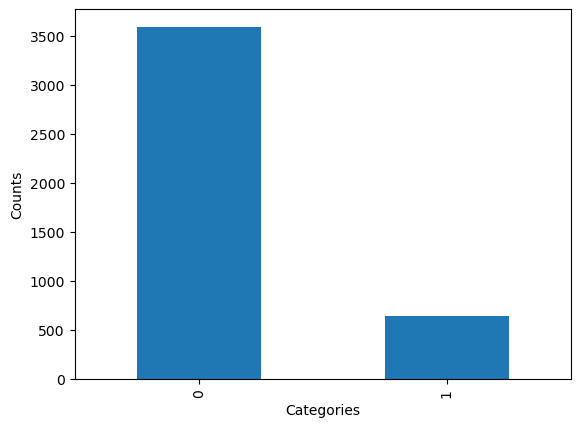

In [8]:
plt.xticks([0,1])
plt.xlim([0,1])
df['TenYearCHD'].value_counts().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Counts')

In [9]:
(df.isna().sum())/len(df)

male               0.000000
age                0.000000
education          0.024764
currentSmoker      0.000000
cigsPerDay         0.006840
BPMeds             0.012500
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            0.011792
sysBP              0.000000
diaBP              0.000000
BMI                0.004481
heartRate          0.000236
glucose            0.091509
TenYearCHD         0.000000
dtype: float64

In [10]:
x=df['education'].values
x[0:50]

array([ 4.,  2.,  1.,  3.,  3.,  2.,  1.,  2.,  1.,  1.,  1.,  2.,  1.,
        3.,  2.,  2.,  3.,  2.,  2.,  2.,  2.,  1.,  1.,  3.,  2.,  4.,
        1.,  2.,  3.,  1.,  4.,  4.,  1., nan,  1.,  2., nan,  1.,  1.,
        3.,  2.,  2.,  1.,  2.,  3.,  2.,  1.,  1.,  2.,  3.])

In [11]:
import missingno as msno

<Axes: >

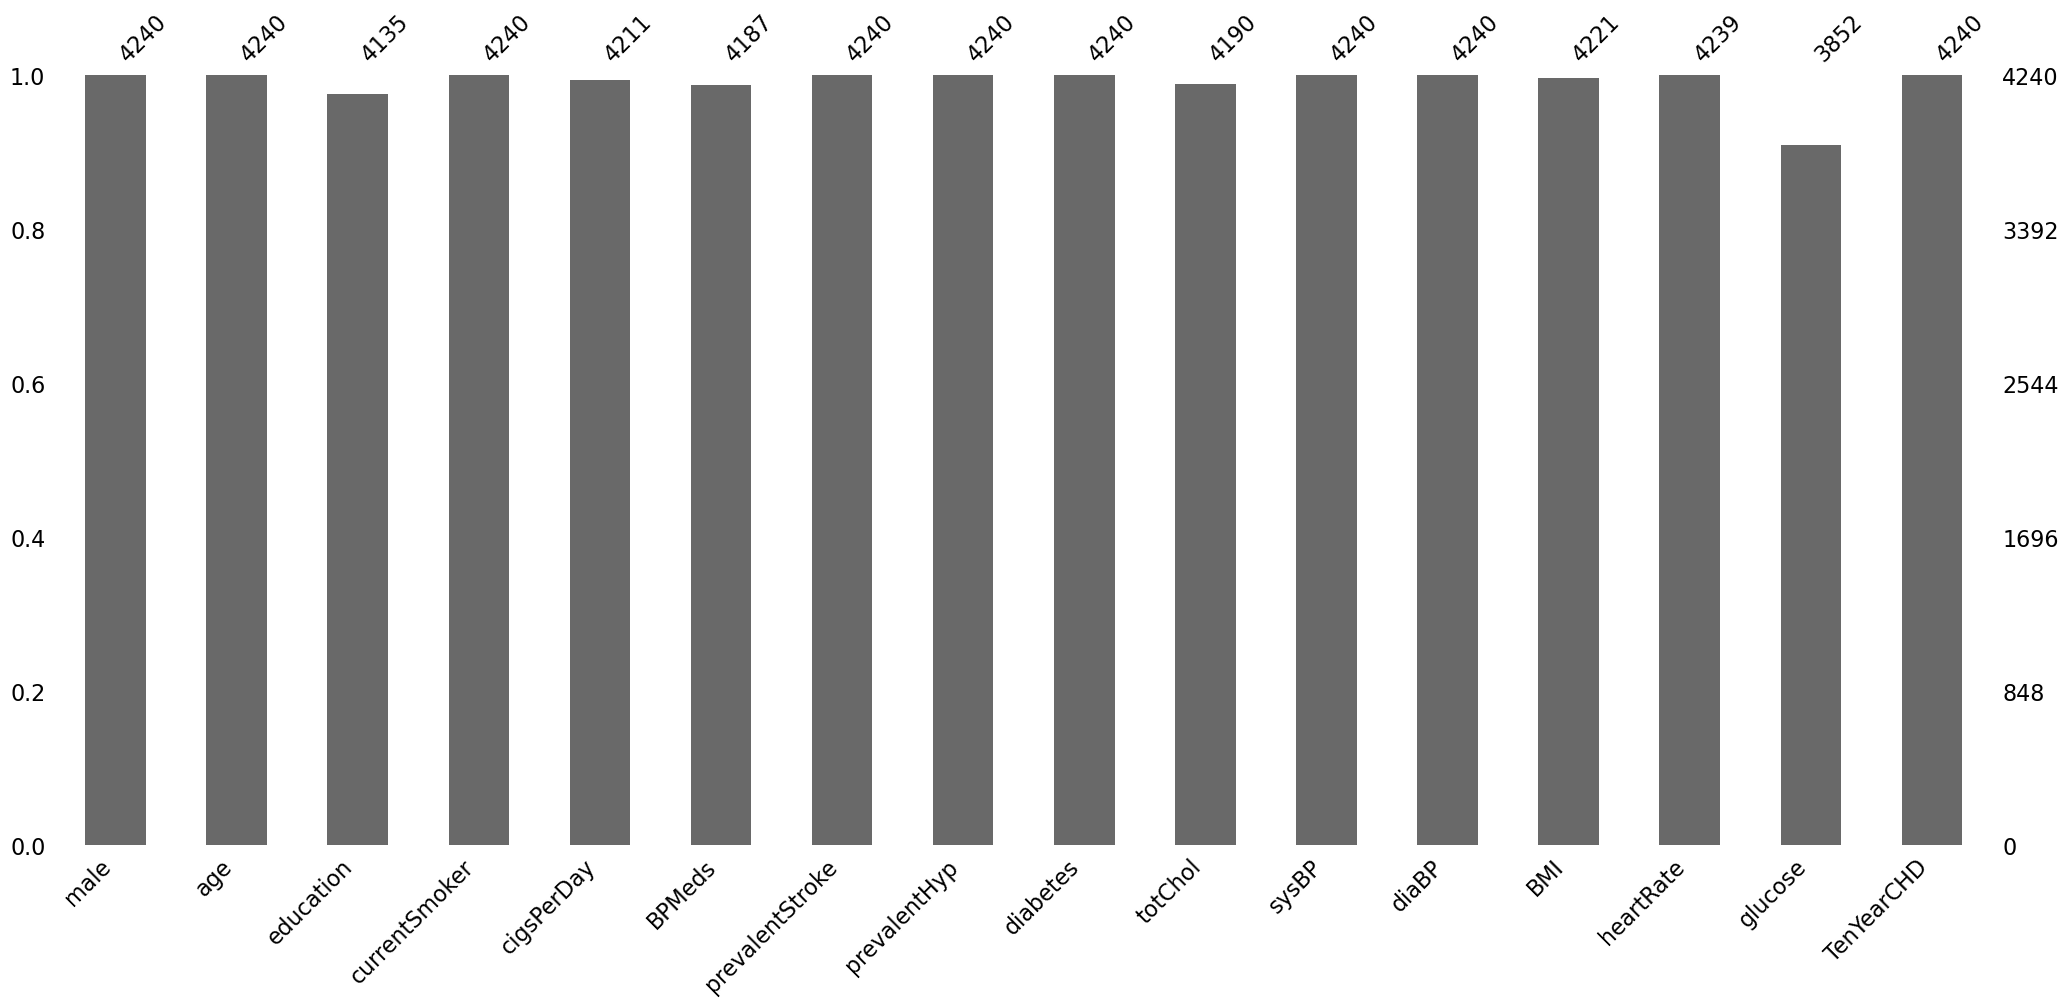

In [12]:
msno.bar(df)

<Axes: >

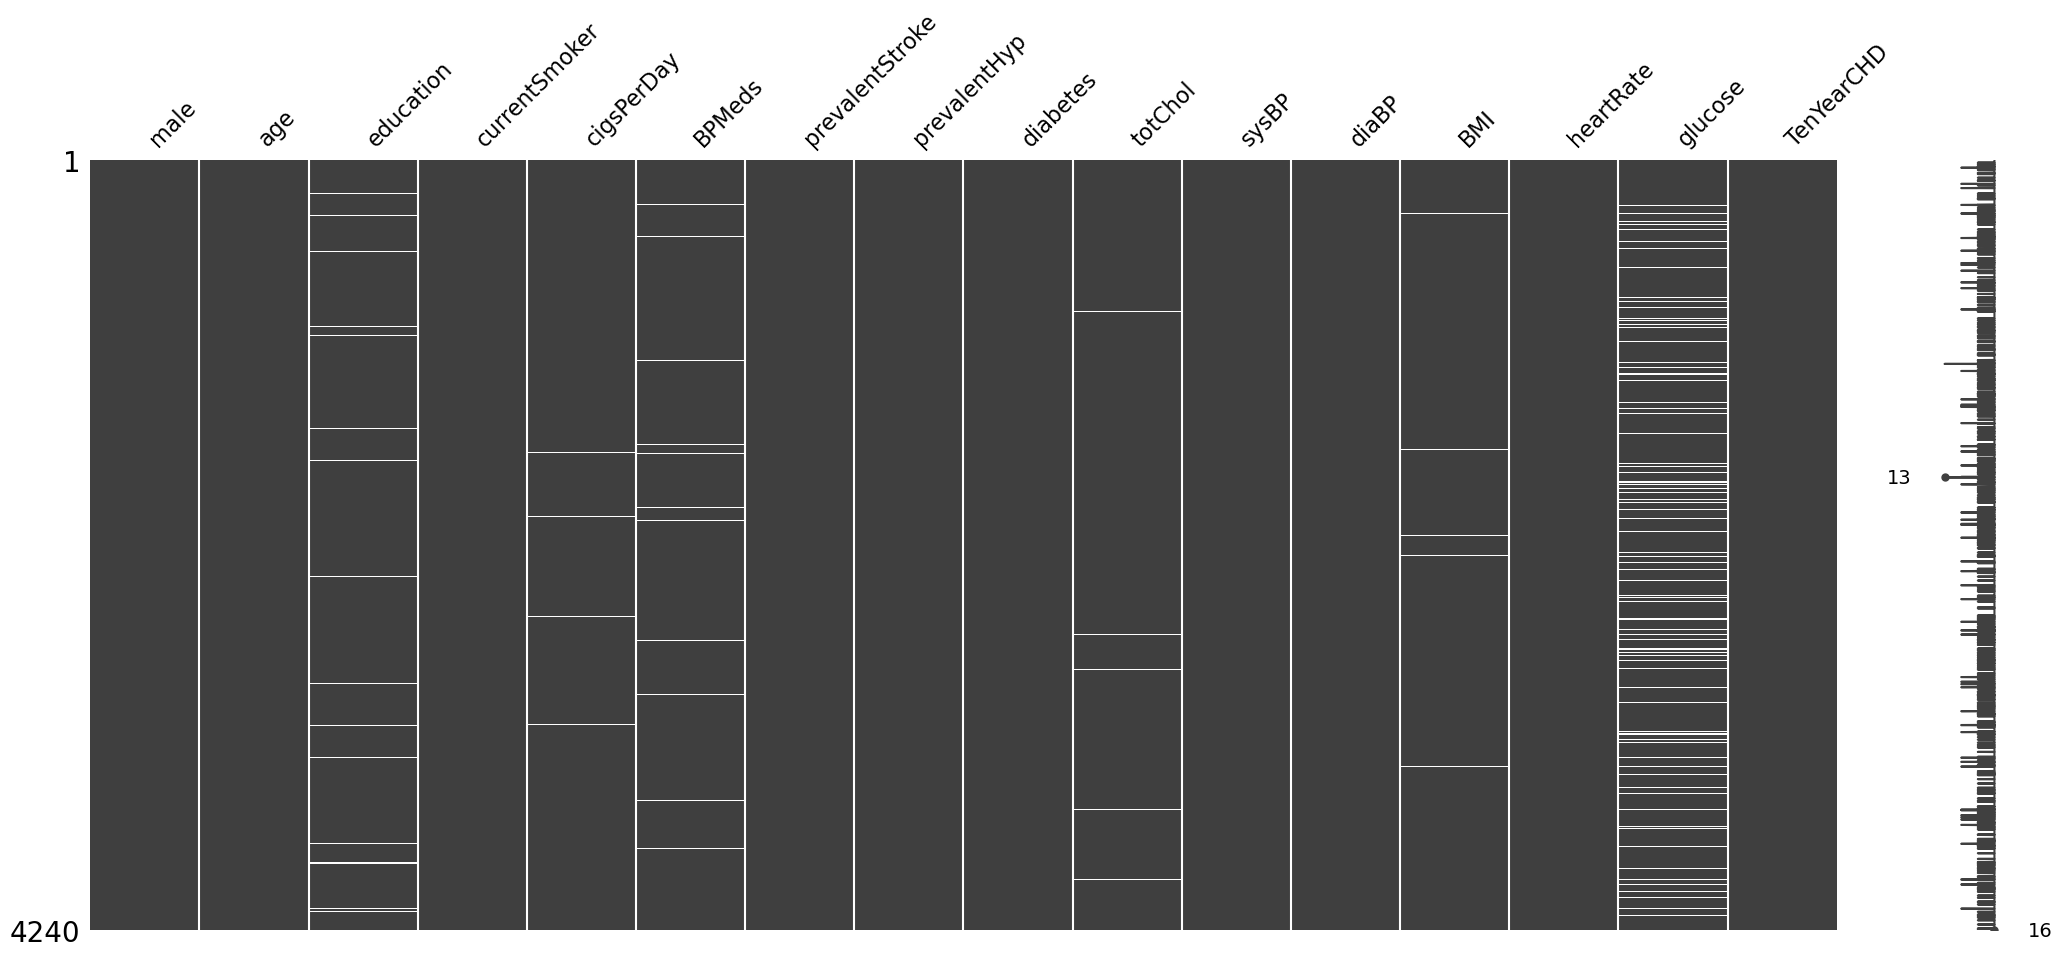

In [13]:
msno.matrix(df)

<Axes: >

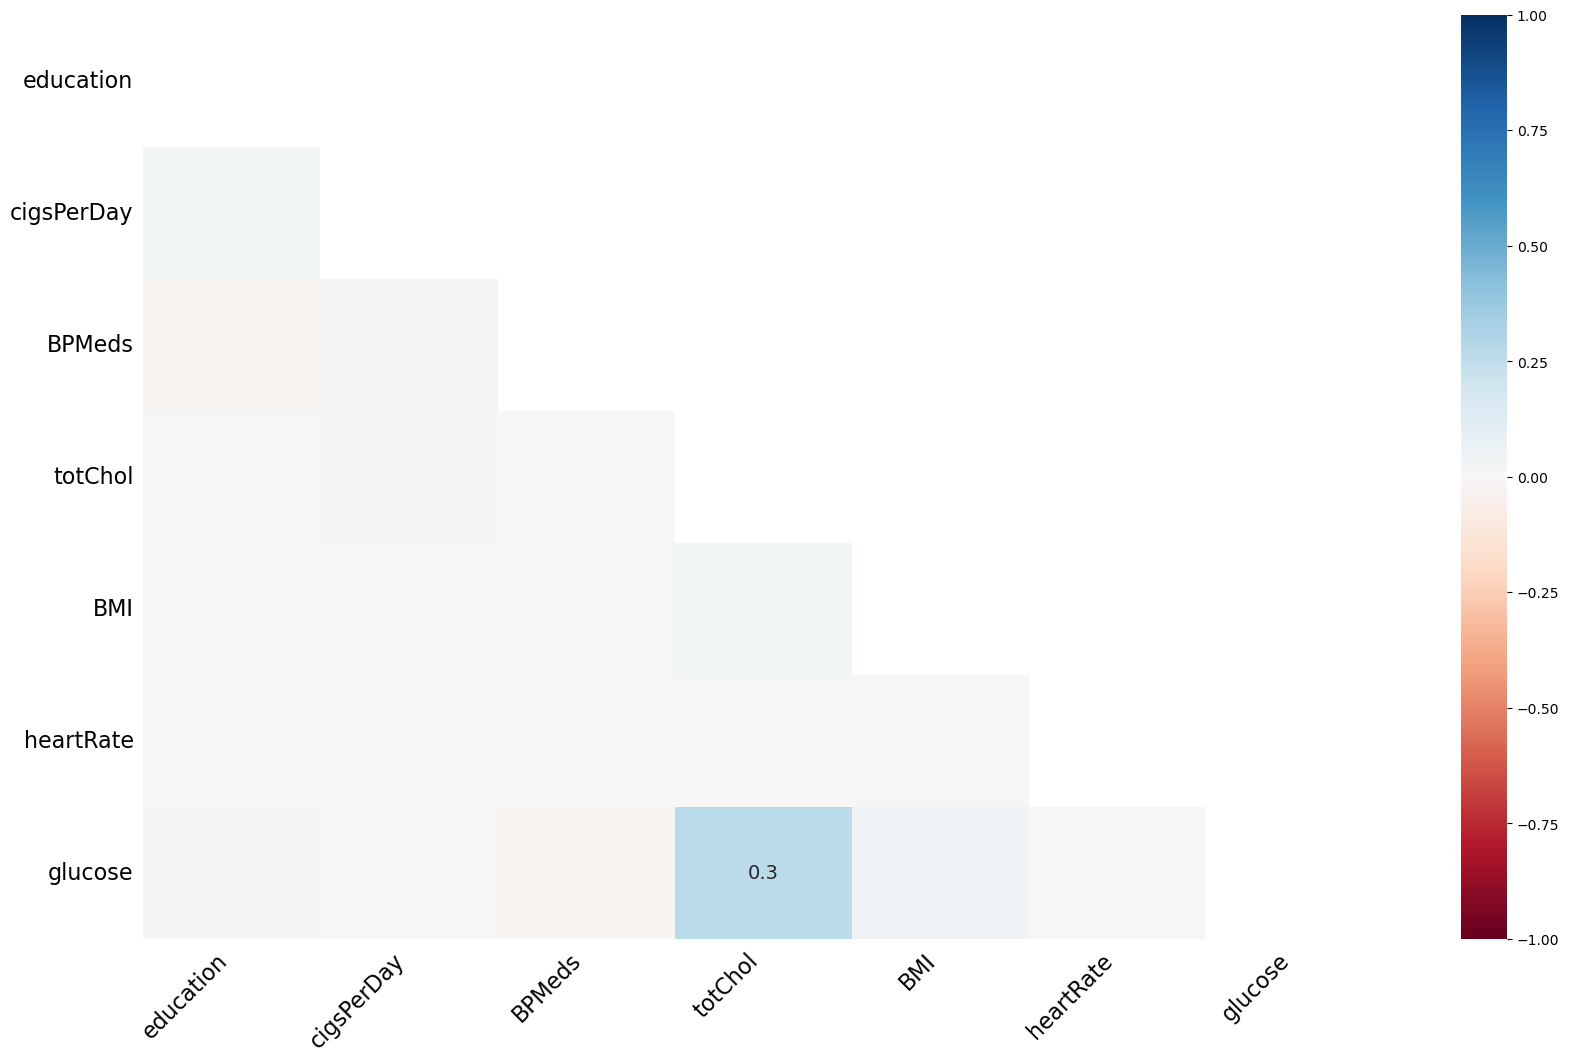

In [14]:
msno.heatmap(df)

In [15]:
df['education']=df['education'].fillna(df['education'].mean())

In [16]:
df.head(132)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,1,38,4.0,0,0.0,0.0,0,0,0,235.0,118.0,77.0,25.87,60.0,82.0,0
128,1,43,1.0,1,15.0,0.0,0,0,0,210.0,115.0,77.5,25.10,70.0,68.0,0
129,0,41,2.0,0,0.0,0.0,0,0,0,213.0,112.0,73.0,24.81,62.0,74.0,0
130,1,53,1.0,1,30.0,0.0,0,0,0,244.0,106.0,67.5,21.84,88.0,65.0,0


In [17]:
null_checker=df['cigsPerDay'].isnull()

In [18]:
for i in range(df.shape[0]):
    if null_checker[i]:
        if df.iloc[i,3]==0:
            df.iloc[i,4]=0
        else:
            df.iloc[i,4]=df['cigsPerDay'].mean()

In [19]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [20]:
df['BPMeds']=df['BPMeds'].fillna(0)

In [21]:
df.isnull().sum()/len(df)

male               0.000000
age                0.000000
education          0.000000
currentSmoker      0.000000
cigsPerDay         0.000000
BPMeds             0.000000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            0.011792
sysBP              0.000000
diaBP              0.000000
BMI                0.004481
heartRate          0.000236
glucose            0.091509
TenYearCHD         0.000000
dtype: float64

In [22]:
df['totChol']=df['totChol'].fillna(df['totChol'].mean())

In [23]:
df['BMI']=df['BMI'].fillna(df['BMI'].mean())

In [24]:
df['heartRate']=df['heartRate'].fillna(df['heartRate'].mean())

In [25]:
df=df.dropna()

In [26]:
df.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [27]:
df.shape

(3852, 16)

In [28]:
df.duplicated().sum()

0

In [29]:
x=df.corr()
x

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.027353,0.020969,0.204329,0.325164,-0.050764,-0.004138,0.000715,0.014521,-0.072029,-0.046149,0.052641,0.075759,-0.116187,0.005979,0.089844
age,-0.027353,1.000000,-0.162708,-0.212047,-0.190913,0.128168,0.064354,0.309435,0.109601,0.260225,0.391511,0.205145,0.135839,-0.006325,0.122356,0.235376
education,0.020969,-0.162708,1.000000,0.024571,0.013860,-0.012886,-0.037468,-0.080139,-0.042175,-0.014476,-0.124497,-0.055287,-0.136331,-0.058990,-0.035431,-0.062622
currentSmoker,0.204329,-0.212047,0.024571,1.000000,0.770655,-0.051893,-0.038117,-0.107791,-0.049491,-0.048446,-0.135492,-0.114337,-0.161686,0.057758,-0.056726,0.018048
cigsPerDay,0.325164,-0.190913,0.013860,0.770655,1.000000,-0.045785,-0.034885,-0.070061,-0.041764,-0.030552,-0.094910,-0.058862,-0.092797,0.069381,-0.058802,0.053511
BPMeds,-0.050764,0.128168,-0.012886,-0.051893,-0.045785,1.000000,0.102981,0.258831,0.055434,0.088014,0.264171,0.196051,0.103863,0.009682,0.050984,0.082377
prevalentStroke,-0.004138,0.064354,-0.037468,-0.038117,-0.034885,0.102981,1.000000,0.074661,0.007006,0.003805,0.063172,0.051441,0.029301,-0.022577,0.018440,0.066680
prevalentHyp,0.000715,0.309435,-0.080139,-0.107791,-0.070061,0.258831,0.074661,1.000000,0.083054,0.164593,0.699793,0.616597,0.301300,0.141136,0.086656,0.181681
diabetes,0.014521,0.109601,-0.042175,-0.049491,-0.041764,0.055434,0.007006,0.083054,1.000000,0.043094,0.112410,0.052286,0.095708,0.059488,0.617630,0.096273
totChol,-0.072029,0.260225,-0.014476,-0.048446,-0.030552,0.088014,0.003805,0.164593,0.043094,1.000000,0.212799,0.166593,0.113181,0.096073,0.046503,0.091723


<Axes: >

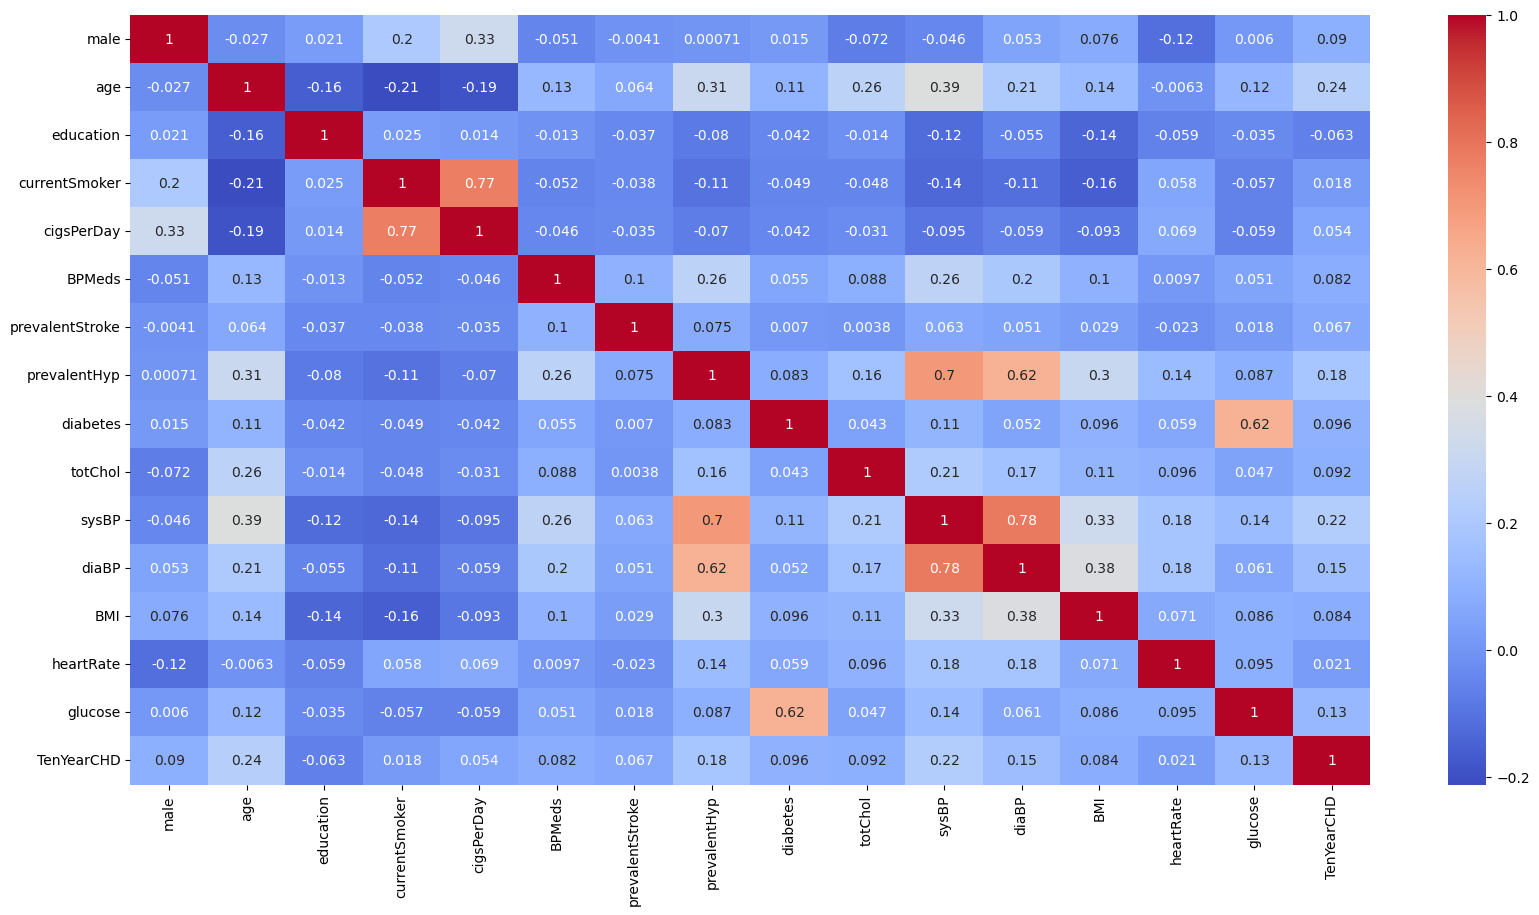

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(x,cmap='coolwarm',annot=True)

In [31]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.

    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.

    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise they are

In [32]:
gender=df.groupby('male').agg({
    'age':'mean',
    'education':'mean',
    'currentSmoker':'sum',
     'cigsPerDay':'mean',
    'BPMeds':'sum',
    'prevalentStroke':'sum',
    'prevalentHyp':'sum',
    'diabetes':'sum',
     'totChol':'mean', 'sysBP':'mean', 'diaBP':'mean', 'BMI':'mean', 'glucose':'mean', 'heartRate':'mean',
    'TenYearCHD':'sum'
    
    
})

In [33]:

gender=gender.astype('float')
gender.dtypes
gender

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose,heartRate,TenYearCHD
male,,,,,,,,,,,,,,,
0,49.84816,1.958563,858.0,5.540790,80.0,14.0,671.0,54.0,239.846109,133.362133,82.372147,25.535141,81.83605,76.968328,269.0
1,49.37478,2.001157,1032.0,13.314411,34.0,10.0,534.0,51.0,233.362697,131.306452,83.640469,26.153985,82.12434,74.178815,325.0


In [34]:

count_female=df[df['male']==0].shape[0]
count_male=df[df['male']==1].shape[0]

gender.iloc[0,2]=gender.iloc[0,2]/count_female
gender.iloc[1,2]=gender.iloc[1,2]/count_male
gender.iloc[0,4:8]=gender.iloc[0,4:8]/count_female
gender.iloc[1,4:8]=gender.iloc[1,4:8]/count_male
gender.iloc[0,-1]=gender.iloc[0,-1]/count_female
gender.iloc[1,-1]=gender.iloc[1,-1]/count_male
gender

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose,heartRate,TenYearCHD
male,,,,,,,,,,,,,,,
0,49.84816,1.958563,0.399627,5.540790,0.037261,0.006521,0.312529,0.025151,239.846109,133.362133,82.372147,25.535141,81.83605,76.968328,0.125291
1,49.37478,2.001157,0.605279,13.314411,0.019941,0.005865,0.313196,0.029912,233.362697,131.306452,83.640469,26.153985,82.12434,74.178815,0.190616


# there are more male smoke and have higher cigerts perday


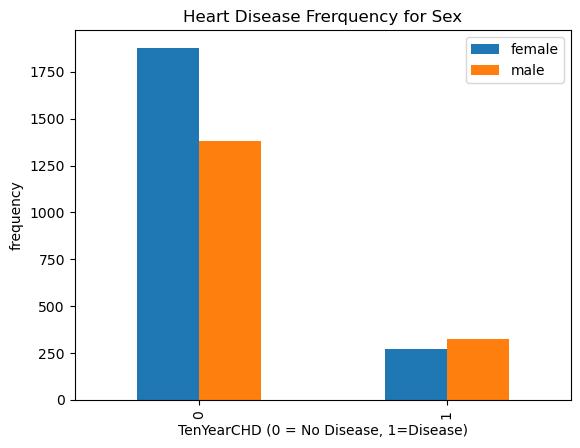

In [35]:
pd.crosstab(df.TenYearCHD,df.male).plot(kind='bar')
plt.xlabel('TenYearCHD (0 = No Disease, 1=Disease)')
plt.ylabel('frequency')
plt.title('Heart Disease Frerquency for Sex')
plt.legend(['female','male'])

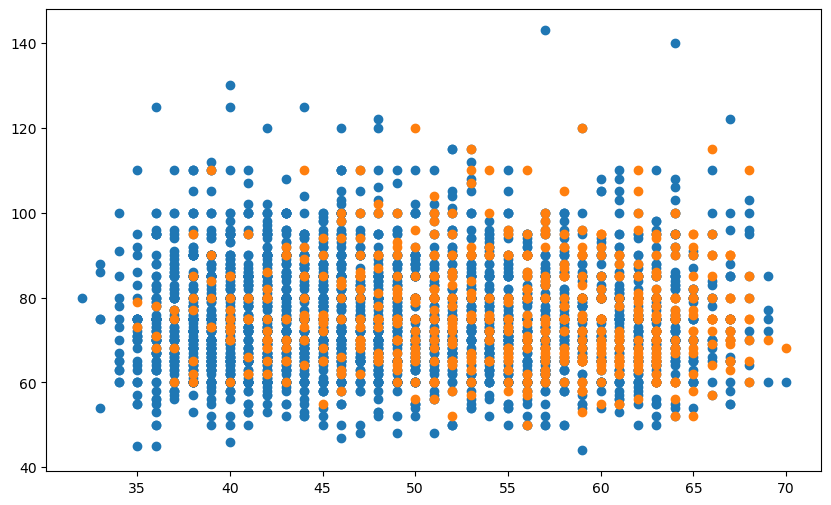

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df['TenYearCHD']==0],df.heartRate[df['TenYearCHD']==0])
plt.scatter(df.age[df['TenYearCHD']==1],df.heartRate[df['TenYearCHD']==1])


In [37]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [38]:
X=df.drop('TenYearCHD',axis=1)
y=df['TenYearCHD']

In [39]:

X[['age','education','totChol','sysBP','diaBP','BMI','heartRate','glucose']]=StandardScaler().fit_transform(X[['age','education','totChol','sysBP','diaBP','BMI','heartRate','glucose']])
X.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,-1.237630,2.004689,0,0.0,0.0,0,0,0,-0.938899,-1.195569,-1.080738,0.286137,0.357765,-0.207240
1,0,-0.423295,0.022384,0,0.0,0.0,0,0,0,0.291304,-0.517610,-0.161568,0.719922,1.615614,-0.248992
2,1,-0.190628,-0.968768,1,20.0,0.0,0,0,0,0.179467,-0.223828,-0.245129,-0.115608,-0.061518,-0.499501
3,0,1.321709,1.013537,1,30.0,0.0,0,1,0,-0.267879,0.793112,1.008284,0.682952,-0.900085,0.878299
4,0,-0.423295,1.013537,1,23.0,0.0,0,0,0,1.074160,-0.110834,0.089114,-0.667699,0.777048,0.126772


In [40]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [42]:
X_train.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1889,0,1.787043,-0.968768,0,0.0,0.0,0,0,0,1.141262,0.612322,0.966504,0.180155,0.357765,-0.332495
3131,0,1.438043,0.022384,0,0.0,0.0,0,1,0,1.991220,1.245085,0.590480,1.944874,-0.313088,0.085020
485,1,0.507374,0.022384,1,40.0,0.0,0,0,0,-0.156043,0.567125,0.590480,-0.021950,-0.061518,0.126772
276,1,0.274707,-0.968768,0,0.0,0.0,0,0,0,-0.491553,-0.156032,-0.245129,0.857945,-0.480802,0.210275
1496,0,-1.121296,1.013537,1,15.0,0.0,0,0,0,1.499139,-0.517610,0.423358,-0.810652,-1.319368,-0.081986


In [43]:
models={
    'Logistic_regression':LogisticRegression(),
    'k_nearest_negihbors':KNeighborsClassifier(),
    'Random_forest_classifier':RandomForestClassifier()       
}

In [44]:
for name ,model in models.items():
    print(name,model)

Logistic_regression LogisticRegression()
k_nearest_negihbors KNeighborsClassifier()
Random_forest_classifier RandomForestClassifier()


In [45]:
def model_and_score(X_train,X_test,y_train,y_test):
    np.random.seed(42)
    scores={}
    for name ,model in models.items():
        model.fit(X_train,y_train)
        score=model.score(X_test,y_test)
        scores[name]=score*100
    return scores    
        
    
    

In [46]:
model_scores=model_and_score(X_train,X_test,y_train,y_test)

/Users/alishgiri/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
model_scores

{'Logistic_regression': 85.21400778210116,
 'k_nearest_negihbors': 83.26848249027238,
 'Random_forest_classifier': 84.8249027237354}

<Axes: >

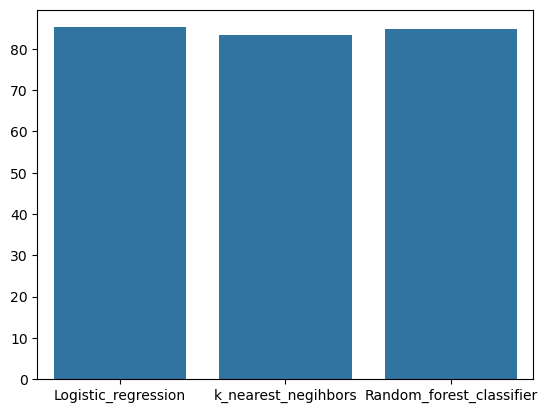

In [48]:
sns.barplot(model_scores)

In [75]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |
 |  Classifier implementing the k-nearest neighbors vote.
 |
 |  Read more in the :ref:`User Guide <classification>`.
 |
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of a q

In [76]:
train_score=[]
test_score=[]
neighbor=range(1,21,1)
for i in neighbor:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))
    
    

In [77]:
test_score

[0.7872892347600519,
 0.8482490272373541,
 0.8249027237354085,
 0.8456549935149157,
 0.8326848249027238,
 0.8417639429312581,
 0.833981841763943,
 0.8443579766536965,
 0.8456549935149157,
 0.8430609597924773,
 0.8443579766536965,
 0.8430609597924773,
 0.8430609597924773,
 0.8443579766536965,
 0.8443579766536965,
 0.8443579766536965,
 0.8456549935149157,
 0.8443579766536965,
 0.8443579766536965,
 0.8443579766536965]

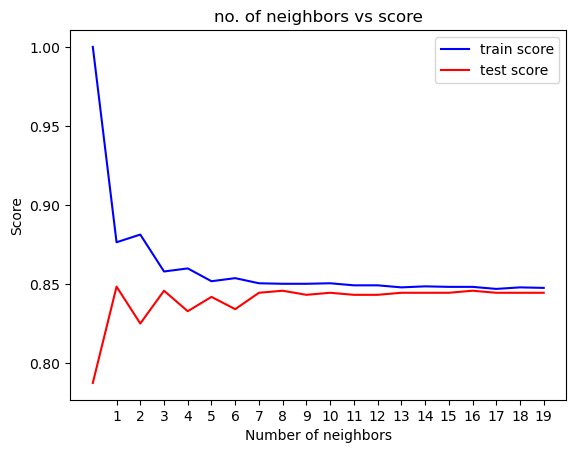

In [78]:
plt.xticks(range(1,21,1))
plt.plot(train_score,color='blue',label='train score')
plt.plot(test_score,color='red',label='test score')
plt.xlabel('Number of neighbors')
plt.ylabel('Score')
plt.title('no. of neighbors vs score')

plt.legend()

In [52]:
knn=KNeighborsClassifier(n_neighbors=9)

In [53]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [54]:
knn.score(X_train,y_train)

0.8500486854917235

In [55]:
op_knn=knn.score(X_test,y_test)

In [56]:
score=cross_val_score(knn,X,y,n_jobs=3,cv=10)

In [57]:
score.mean()

0.8406029203956665

In [79]:
weight=np.linspace(0.05,0.95,20)
log_reg_grid={
    'C':np.logspace(-4,4,20),
    'class_weight':[{0:x,1:1-x}for x in weight]
    
}
rf={
    'n_estimators': np.arange(10,1000,50),
    "max_depth": [None,3,5,10],
    "min_samples_split": np.arange(2,20,2),
    "min_samples_leaf": np.arange(1,20,2),
    'class_weight':[{0:x,1:1-x}for x in weight]
}


In [59]:
log_grid=GridSearchCV(LogisticRegression(),
            param_grid=log_reg_grid,
            n_jobs=-1,
            cv=5,
            verbose=3
             
             
            )

In [60]:
log_grid.fit(X_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


/Users/alishgiri/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alishgiri/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

[CV 3/5] END C=0.0001, class_weight={0: 0.05, 1: 0.95};, score=0.154 total time=   0.0s
[CV 4/5] END C=0.0001, class_weight={0: 0.14473684210526316, 1: 0.8552631578947368};, score=0.461 total time=   0.0s
[CV 2/5] END C=0.0001, class_weight={0: 0.19210526315789472, 1: 0.8078947368421052};, score=0.846 total time=   0.0s
[CV 3/5] END C=0.0001, class_weight={0: 0.23947368421052628, 1: 0.7605263157894737};, score=0.846 total time=   0.0s
[CV 1/5] END C=0.0001, class_weight={0: 0.28684210526315784, 1: 0.7131578947368422};, score=0.846 total time=   0.0s
[CV 5/5] END C=0.0001, class_weight={0: 0.28684210526315784, 1: 0.7131578947368422};, score=0.846 total time=   0.0s
[CV 2/5] END C=0.0001, class_weight={0: 0.381578947368421, 1: 0.618421052631579};, score=0.846 total time=   0.0s
[CV 1/5] END C=0.0001, class_weight={0: 0.4289473684210526, 1: 0.5710526315789475};, score=0.846 total time=   0.0s
[CV 4/5] END C=0.0001, class_weight={0: 0.47631578947368414, 1: 0.5236842105263159};, score=0.846

/Users/alishgiri/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alishgiri/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

[CV 3/5] END C=0.0001, class_weight={0: 0.09736842105263158, 1: 0.9026315789473685};, score=0.154 total time=   0.0s
[CV 2/5] END C=0.0001, class_weight={0: 0.33421052631578946, 1: 0.6657894736842105};, score=0.846 total time=   0.0s
[CV 4/5] END C=0.0001, class_weight={0: 0.381578947368421, 1: 0.618421052631579};, score=0.846 total time=   0.0s
[CV 3/5] END C=0.0001, class_weight={0: 0.4289473684210526, 1: 0.5710526315789475};, score=0.846 total time=   0.0s
[CV 3/5] END C=0.0001, class_weight={0: 0.47631578947368414, 1: 0.5236842105263159};, score=0.846 total time=   0.0s
[CV 5/5] END C=0.0001, class_weight={0: 0.5236842105263158, 1: 0.47631578947368425};, score=0.846 total time=   0.0s
[CV 1/5] END C=0.0001, class_weight={0: 0.5710526315789474, 1: 0.42894736842105263};, score=0.846 total time=   0.0s
[CV 2/5] END C=0.0001, class_weight={0: 0.6657894736842105, 1: 0.3342105263157895};, score=0.846 total time=   0.0s
[CV 3/5] END C=0.0001, class_weight={0: 0.6657894736842105, 1: 0.3342

/Users/alishgiri/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alishgiri/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

[CV 2/5] END C=0.0001, class_weight={0: 0.05, 1: 0.95};, score=0.154 total time=   0.0s
[CV 4/5] END C=0.0001, class_weight={0: 0.19210526315789472, 1: 0.8078947368421052};, score=0.841 total time=   0.0s
[CV 2/5] END C=0.0001, class_weight={0: 0.23947368421052628, 1: 0.7605263157894737};, score=0.846 total time=   0.0s
[CV 2/5] END C=0.0001, class_weight={0: 0.28684210526315784, 1: 0.7131578947368422};, score=0.846 total time=   0.0s
[CV 1/5] END C=0.0001, class_weight={0: 0.33421052631578946, 1: 0.6657894736842105};, score=0.846 total time=   0.0s
[CV 5/5] END C=0.0001, class_weight={0: 0.33421052631578946, 1: 0.6657894736842105};, score=0.846 total time=   0.0s
[CV 2/5] END C=0.0001, class_weight={0: 0.4289473684210526, 1: 0.5710526315789475};, score=0.846 total time=   0.0s
[CV 2/5] END C=0.0001, class_weight={0: 0.47631578947368414, 1: 0.5236842105263159};, score=0.846 total time=   0.0s
[CV 3/5] END C=0.0001, class_weight={0: 0.5236842105263158, 1: 0.47631578947368425};, score=0.

/Users/alishgiri/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+0...
                                          {0: 0.618421052631579,
                                           1: 0.381578947368421},
                                          {0: 0.6657894736842105,
                                           1: 0.3342105263157895},
                                          {0: 0.7131578947368421,
                                           1: 0.2868421052631579},
                                          {0: 0.7605263157894736,
                                           1: 0.2394736842105264},
                                          {0: 0.8078947368421052,
                                           1: 0.19210526315789478},
                                          {0: 0.8552631578947368,
                                           1: 0.14473684210526316},
                                          {0: 0.9026315789473683,
                                           1: 0.09736842105263166},
                                          {0: 0.95, 1: 0.050000000000000044}]},
             verbose=3)

In [61]:
log_grid.best_params_

{'C': 0.08858667904100823,
 'class_weight': {0: 0.47631578947368414, 1: 0.5236842105263159}}

In [62]:
grid_log_score=log_grid.score(X_test,y_test)
grid_log_score

0.85473411154345

In [80]:
rf_grid = RandomizedSearchCV(RandomForestClassifier(),
                             
                            param_distributions=rf,
                                cv=5,
                                n_iter=20,
                             n_jobs=-1,
                                verbose=True)

In [81]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'class_weight': [{0: 0.05, 1: 0.95},
                                                         {0: 0.09736842105263158,
                                                          1: 0.9026315789473685},
                                                         {0: 0.14473684210526316,
                                                          1: 0.8552631578947368},
                                                         {0: 0.19210526315789472,
                                                          1: 0.8078947368421052},
                                                         {0: 0.23947368421052628,
                                                          1: 0.7605263157894737},
                                                         {0: 0.28684210526315784,
                                                          1: 0.71315789473...
                                                         {0: 0.8552631578947368,
                                                          1: 0.14473684210526316},
                                                         {0: 0.9026315789473683,
                                                          1: 0.09736842105263166},
                                                         {0: 0.95,
                                                          1: 0.050000000000000044}],
                                        'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [91]:
rf_score=rf_grid.score(X_test,y_test)
rf_grid.best_params_

{'n_estimators': 10,
 'min_samples_split': 12,
 'min_samples_leaf': 17,
 'max_depth': 3,
 'class_weight': {0: 0.33421052631578946, 1: 0.6657894736842105}}

In [83]:
model_scores.update([('GridS LR',grid_log_score*100),('RandomizedS RF',rf_score*100),('optimazed_knn',op_knn*100)])

<Axes: >

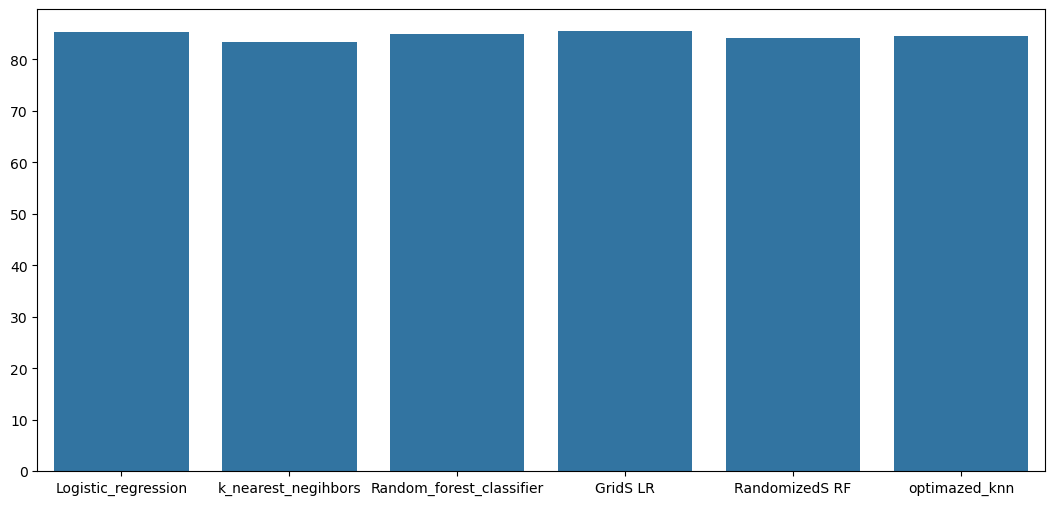

In [84]:
plt.figure(figsize=(13,6))
sns.barplot(model_scores)

In [85]:
yhat_rf=rf_grid.predict(X_test)
yhat_lr=log_grid.predict(X_test)
yhat_knn=knn.predict(X_test)

In [86]:
output=pd.DataFrame({
        'rf':yhat_rf,
    'lr':yhat_lr,
    'knn':yhat_knn
    
})

In [87]:
output['lr'].value_counts()

lr
0    756
1     15
Name: count, dtype: int64

In [88]:
y_test.value_counts()

TenYearCHD
0    652
1    119
Name: count, dtype: int64

In [89]:
model_scores

{'Logistic_regression': 85.21400778210116,
 'k_nearest_negihbors': 83.26848249027238,
 'Random_forest_classifier': 84.8249027237354,
 'GridS LR': 85.473411154345,
 'RandomizedS RF': 84.17639429312581,
 'optimazed_knn': 84.56549935149157}

In [92]:
df.head()



,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [131]:
with open('Randomforest','wb') as RandomForest:
    pickle.dump(rf_grid,RandomForest)


In [132]:
with open('logisticRegression','wb') as logisticRegression:
    pickle.dump(log_grid,logisticRegression)

In [133]:
with open('knn','wb') as Knn:
    pickle.dump(knn,Knn)


In [135]:
with open('scaler','wb') as scalar:
    

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
654,0,-1.004963,-0.968768,1,5.0,0.0,0,0,0,0.067630,-1.150372,-1.206080,-0.576506,-0.900085,0.043269
416,1,-0.539628,-0.968768,1,20.0,0.0,0,0,0,0.201834,-0.969583,-0.913616,-0.990574,-0.061518,1.504572
3916,1,1.438043,-0.968768,1,30.0,0.0,0,0,0,3.042484,0.273343,0.172675,-0.606082,0.357765,-0.624755
793,0,-0.655962,-0.968768,0,0.0,0.0,0,0,0,-0.402083,-0.156032,0.590480,1.888187,1.028618,-0.374246
1033,0,-0.655962,0.022384,0,0.0,0.0,0,1,0,-1.117837,-0.472413,0.005553,1.131526,0.777048,-0.290743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,0,-1.121296,-0.968768,1,20.0,0.0,0,0,0,0.783385,-0.427215,-0.662934,-0.672629,0.357765,-0.791761
2823,1,-0.190628,-0.968768,1,20.0,0.0,0,0,0,1.074160,-0.743596,-0.161568,-0.667699,2.034897,-1.000519
2354,1,-1.470297,-0.968768,1,25.0,0.0,0,0,0,0.134732,-0.336821,-0.662934,0.833298,-1.319368,-0.165489
4116,1,-1.121296,1.013537,0,0.0,0.0,0,0,0,-0.536287,0.747914,0.005553,0.214660,-0.564658,0.502536
